In [1260]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [1261]:

dataset = pd.read_csv('./input/tmdb_5000_movies.csv')

In [1262]:
dataset.head()
dataset.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [1263]:
dataset = dataset.drop(['id', 'homepage', 'vote_count', 'overview', 'spoken_languages', 'production_companies'],axis=1)
dataset = dataset.dropna()
dataset.isnull().sum()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3959 entries, 0 to 4801
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                3959 non-null   int64  
 1   genres                3959 non-null   object 
 2   keywords              3959 non-null   object 
 3   original_language     3959 non-null   object 
 4   original_title        3959 non-null   object 
 5   popularity            3959 non-null   float64
 6   production_countries  3959 non-null   object 
 7   release_date          3959 non-null   object 
 8   revenue               3959 non-null   int64  
 9   runtime               3959 non-null   float64
 10  status                3959 non-null   object 
 11  tagline               3959 non-null   object 
 12  title                 3959 non-null   object 
 13  vote_average          3959 non-null   float64
dtypes: float64(3), int64(2), object(9)
memory usage: 463.9+ KB


<AxesSubplot:>

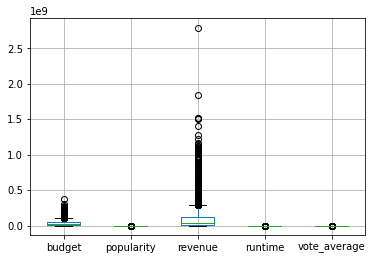

In [1264]:
dataset.boxplot()

In [1265]:
def make_it_neat(data,name):
    arr=data[name].values
    pp=[]
    for i in arr:
        x=i
        x=x.replace('{','').replace('}','').replace('[','').replace(']','')
        x= ''.join([i for i in x if not i.isdigit()])
        p=[]
        x = x.replace('"id"','').replace('"name"','').replace('so_3166_1','').replace('o_3166_1','').replace('o_3166_1','').replace(':','').replace(" ", "").replace("\"", "")
        split = x.split(',')
        l = list(filter(None,  split))
        for i in l:
            if i[2:].isdigit():
                continue
            elif i:
                p.append(i)
        pp.append(p)
    data[name]=pp

make_it_neat(dataset,'keywords')
make_it_neat(dataset,'genres')


In [1266]:
dataset.head()

,budget,genres,keywords,original_language,original_title,popularity,production_countries,release_date,revenue,runtime,status,tagline,title,vote_average
0,237000000,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...",en,Avatar,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2
1,300000000,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...",en,Pirates of the Caribbean: At World's End,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9
2,245000000,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi, b...",en,Spectre,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3
3,250000000,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...",en,The Dark Knight Rises,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6
4,260000000,"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...",en,John Carter,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1


In [1267]:
list_of_list = [item for line in dataset.genres.values for item in line]

keywords_ds = pd.DataFrame(list_of_list, columns=['genres'])

vc = keywords_ds.value_counts()

genres = [name[0] for idx, name in enumerate(vc.index.tolist())]

def get_most_relevant_genres(genres_field):
    for genre_type in genres:
        if genre_type in genres_field:
            return genre_type


dataset['y'] = dataset['genres'].apply(lambda x: get_most_relevant_genres(x))
cluster_labels = dataset['y'].tolist()
dataset = dataset.drop(['y', 'genres'],axis=1)


[('duringcreditsstinger',), ('womandirector',), ('independentfilm',), ('basedonnovel',), ('murder',), ('aftercreditsstinger',), ('violence',), ('dystopia',), ('revenge',), ('sport',), ('sex',), ('d',), ('teenager',), ('friendship',), ('s',), ('musical',), ('sequel',), ('biography',), ('love',), ('suspense',), ('newyork',), ('police',), ('losangeles',), ('highschool',), ('alien',), ('nudity',), ('londonengland',), ('superhero',), ('prison',), ('family',), ('dyinganddeath',), ('drug',), ('fathersonrelationship',), ('remake',), ('wedding',), ('serialkiller',), ('daughter',), ('corruption',), ('magic',), ('kidnapping',), ('basedoncomicbook',), ('suicide',), ('airplane',), ('friends',), ('fbi',), ('escape',), ('survival',), ('worldwarii',), ('party',), ('hospital',), ('martialarts',), ('timetravel',), ('femalenudity',), ('fight',), ('cia',), ('lawyer',), ('basedontruestory',), ('future',), ('secret',), ('basedonyoungadultnovel',), ('brotherbrotherrelationship',), ('investigation',), ('newyo

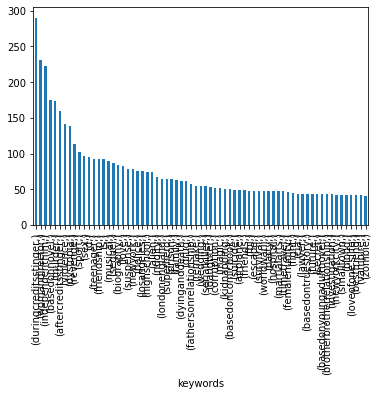

In [1268]:
list_of_list = [item for line in dataset.keywords.values for item in line]

keywords_ds = pd.DataFrame(list_of_list, columns=['keywords'])

vc = keywords_ds.value_counts()

print(vc[vc > 40].index.tolist())
print(vc[vc > 40])
print(vc[vc > 40].plot.bar())


In [1269]:
column_names = [name[0] for idx, name in enumerate(vc[vc > 40].index.tolist())]

for keywords in column_names:
    dataset[keywords] = dataset['keywords'].str.contains(keywords).apply(lambda x:1 if x else 0)
dataset[:5]

dataset = dataset.drop(['keywords'],axis=1)

In [1270]:
# Grande maioria é ingles

vc_l = dataset['original_language'].value_counts()

column_names = [name for idx, name in enumerate(vc_l[vc_l > 2].index.tolist())]

for language in column_names:
    dataset[language] = dataset['original_language'].str.contains(language).apply(lambda x:1 if x else 0)
dataset[:5]

dataset = dataset.drop(['original_language'],axis=1)


In [1271]:
dataset['status'].value_counts()

dataset = dataset.drop(['status'],axis=1)

In [1272]:
dataset['original_title'].value_counts()

dataset = dataset.drop(['original_title', 'title', 'production_countries', 'tagline'],axis=1)


In [1273]:
# TODO: Não tão relevante, então talvez devemos remover para testes
dataset = dataset.drop(['release_date', 'vote_average'],axis=1)

In [1274]:
dataset.head()

,budget,popularity,revenue,runtime,duringcreditsstinger,womandirector,independentfilm,basedonnovel,murder,aftercreditsstinger,...,de,ja,zh,hi,it,ko,cn,ru,pt,da
0,237000000,150.437577,2787965087,162.0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,300000000,139.082615,961000000,169.0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,245000000,107.376788,880674609,148.0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,250000000,112.312950,1084939099,165.0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,260000000,43.926995,284139100,132.0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [1275]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3959 entries, 0 to 4801
Data columns (total 86 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   budget                      3959 non-null   int64  
 1   popularity                  3959 non-null   float64
 2   revenue                     3959 non-null   int64  
 3   runtime                     3959 non-null   float64
 4   duringcreditsstinger        3959 non-null   int64  
 5   womandirector               3959 non-null   int64  
 6   independentfilm             3959 non-null   int64  
 7   basedonnovel                3959 non-null   int64  
 8   murder                      3959 non-null   int64  
 9   aftercreditsstinger         3959 non-null   int64  
 10  violence                    3959 non-null   int64  
 11  dystopia                    3959 non-null   int64  
 12  revenge                     3959 non-null   int64  
 13  sport                       3959 

,budget,popularity,revenue,runtime,duringcreditsstinger,womandirector,independentfilm,basedonnovel,murder,aftercreditsstinger,...,de,ja,zh,hi,it,ko,cn,ru,pt,da
count,3.959000e+03,3959.000000,3.959000e+03,3959.000000,3959.0,3959.0,3959.0,3959.0,3959.0,3959.0,...,3959.000000,3959.000000,3959.000000,3959.000000,3959.000000,3959.000000,3959.000000,3959.000000,3959.000000,3959.000000
mean,3.344110e+07,24.691133,9.690687e+07,108.053296,1.0,1.0,1.0,1.0,1.0,1.0,...,0.003789,0.003284,0.003031,0.002778,0.002273,0.002021,0.002021,0.001263,0.001263,0.001010
std,4.252666e+07,33.868552,1.738999e+08,20.685888,0.0,0.0,0.0,0.0,0.0,0.0,...,0.061445,0.057216,0.054979,0.052645,0.047631,0.044913,0.044913,0.035520,0.035520,0.031774
min,0.000000e+00,0.000372,0.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.500000e+06,7.028132,7.456755e+05,94.000000,1.0,1.0,1.0,1.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.980000e+07,16.245068,3.248341e+07,104.000000,1.0,1.0,1.0,1.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.500000e+07,32.124884,1.140364e+08,118.000000,1.0,1.0,1.0,1.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


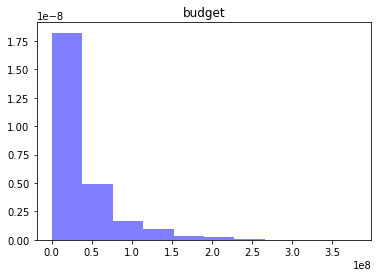

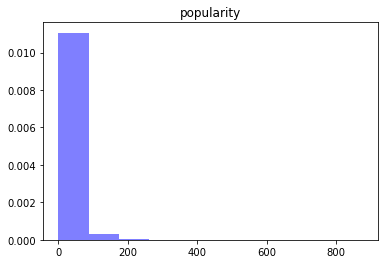

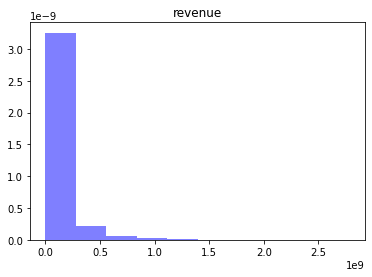

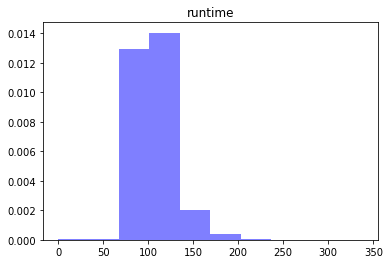

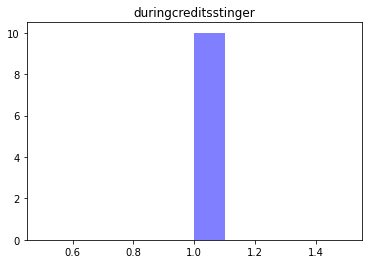

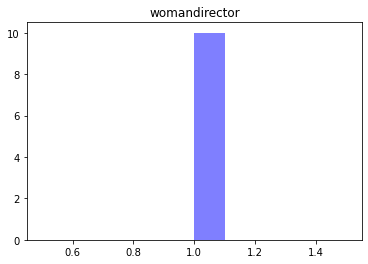

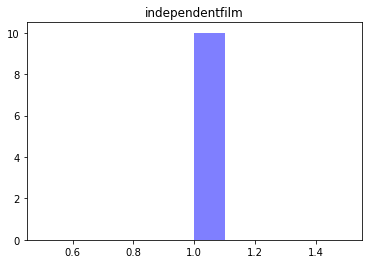

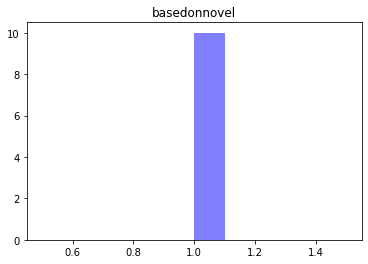

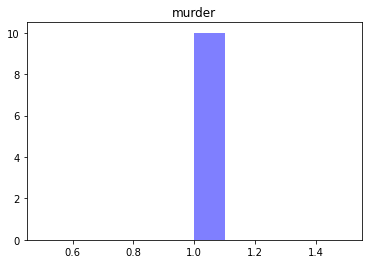

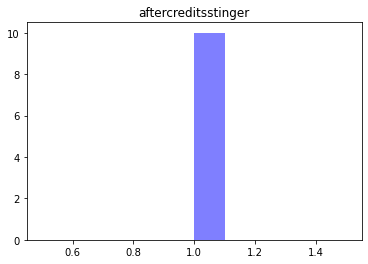

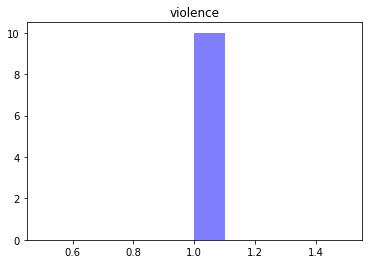

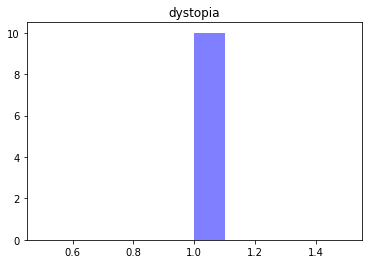

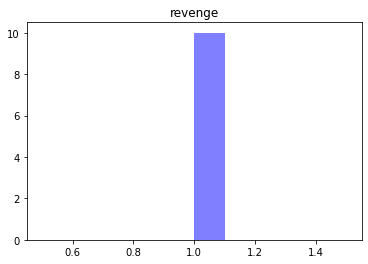

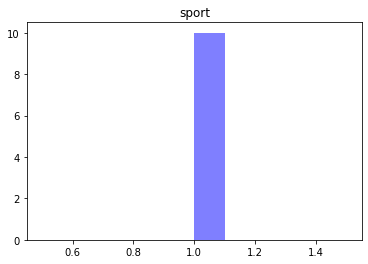

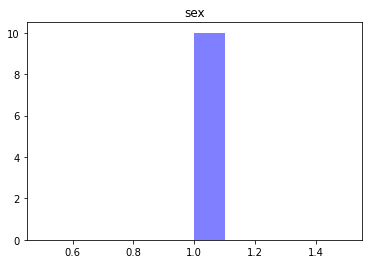

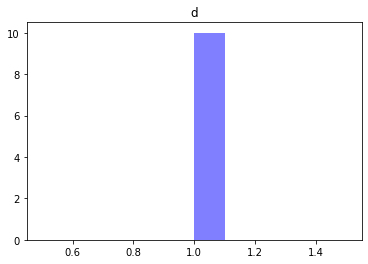

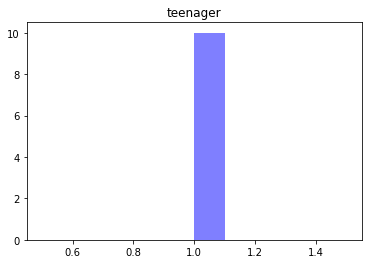

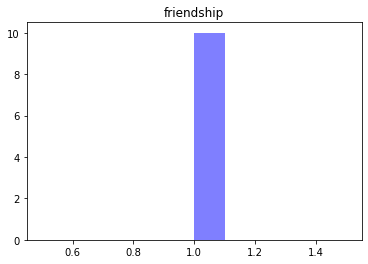

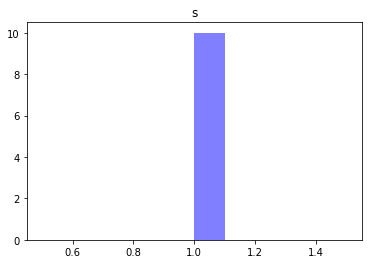

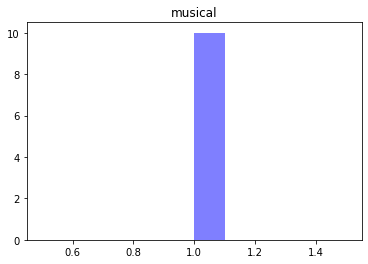

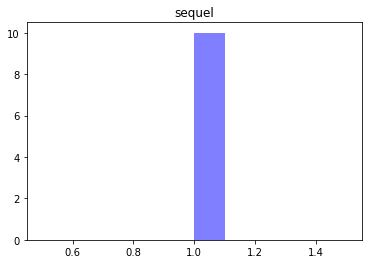

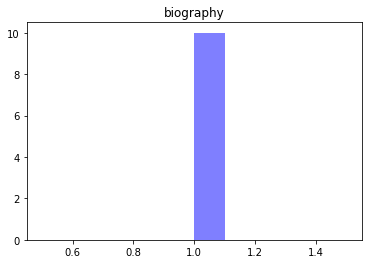

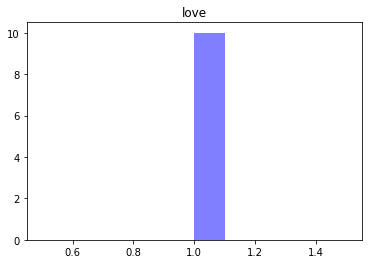

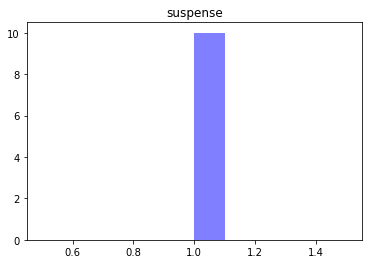

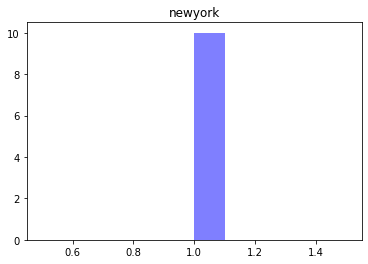

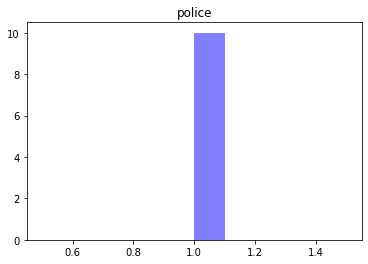

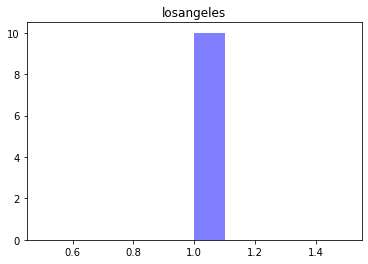

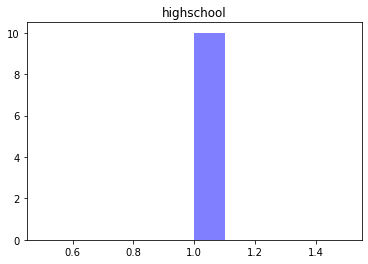

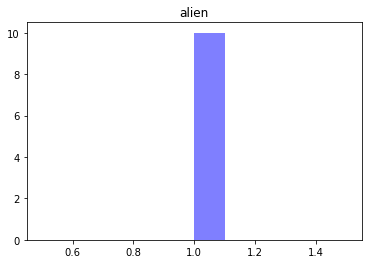

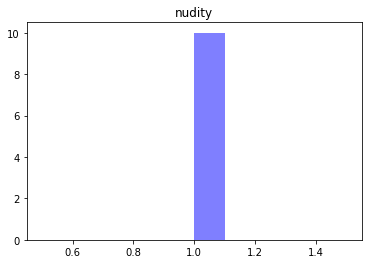

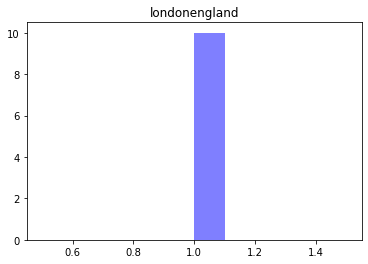

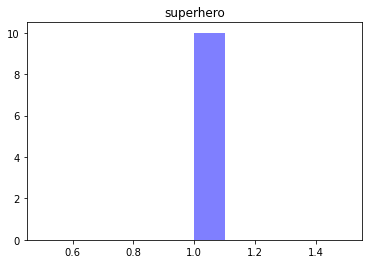

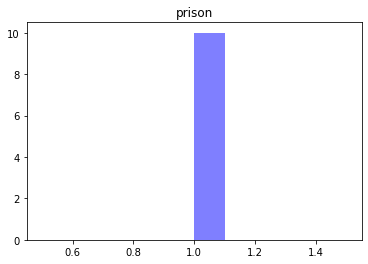

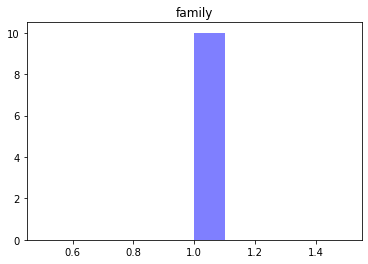

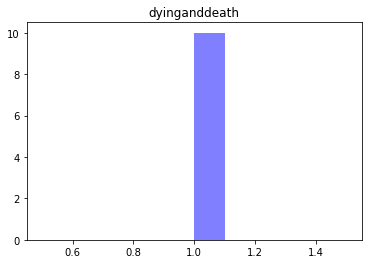

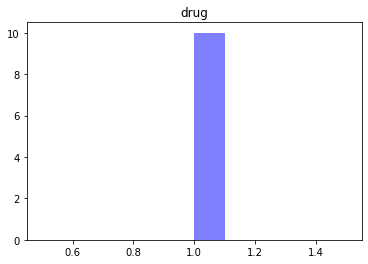

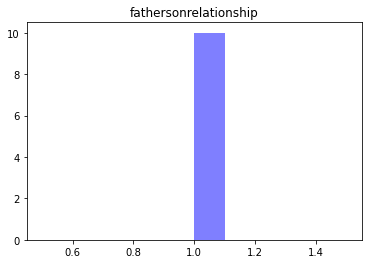

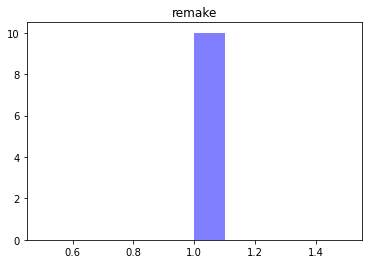

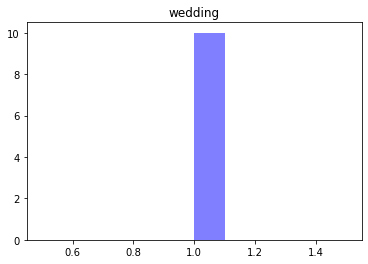

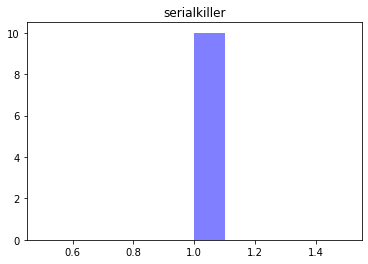

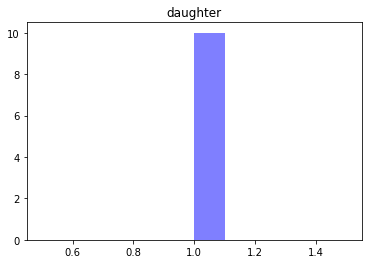

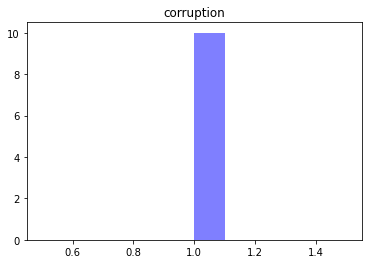

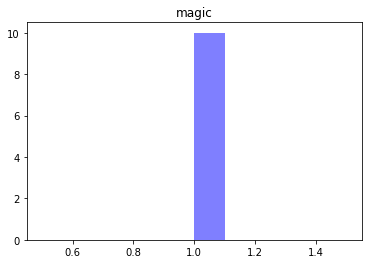

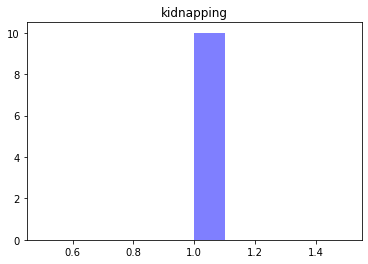

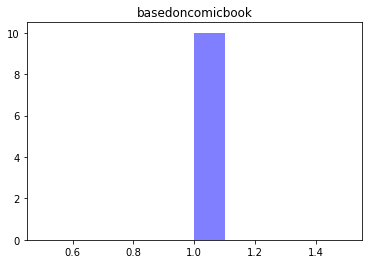

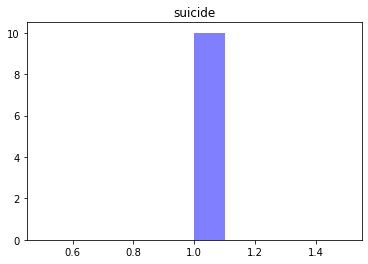

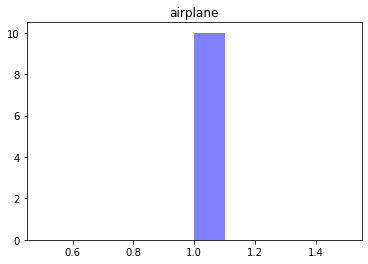

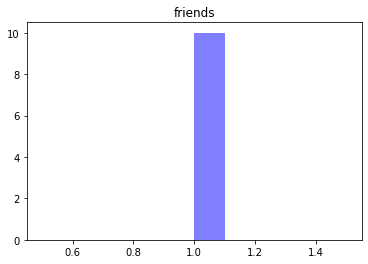

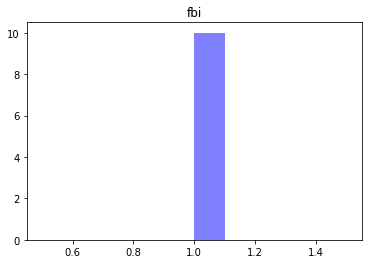

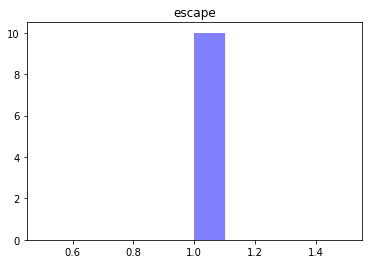

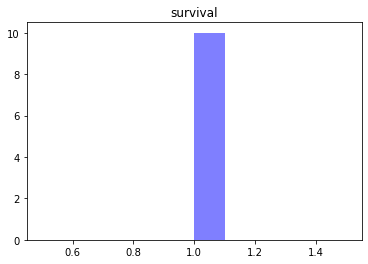

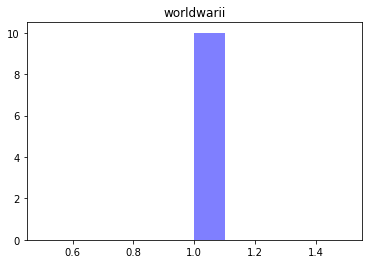

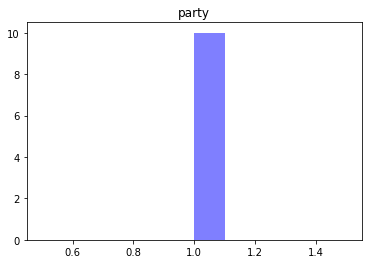

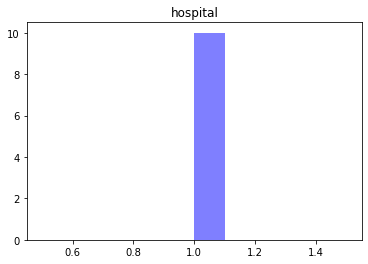

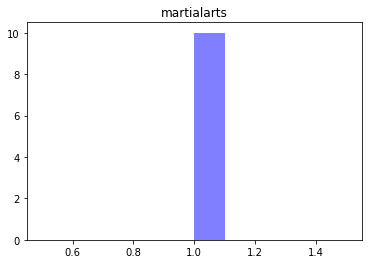

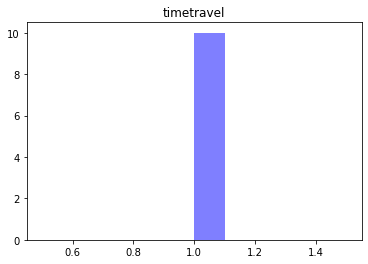

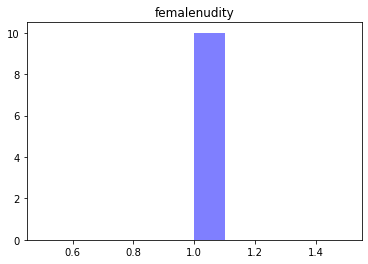

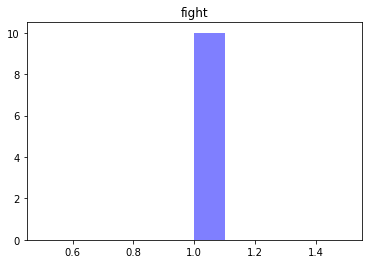

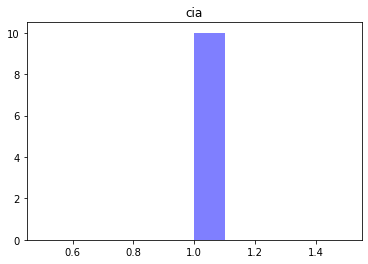

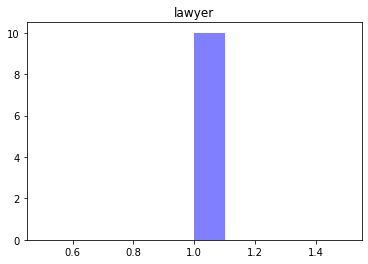

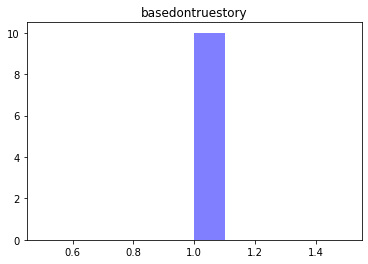

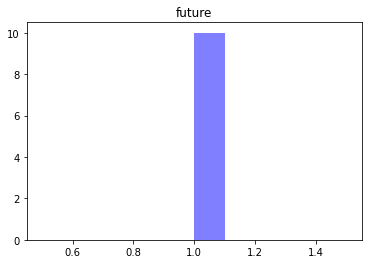

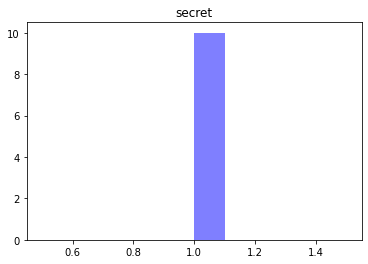

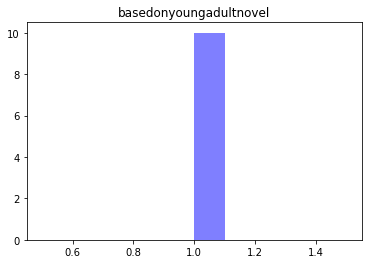

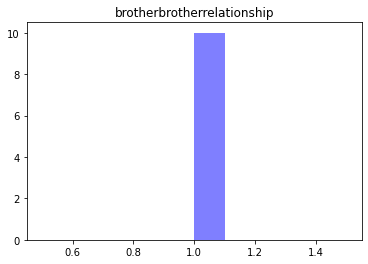

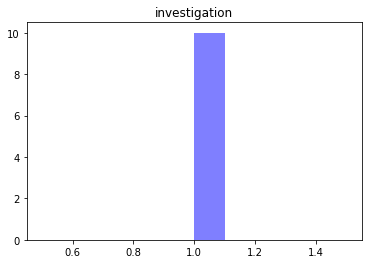

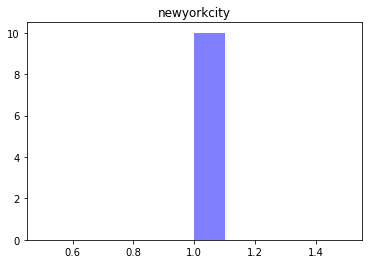

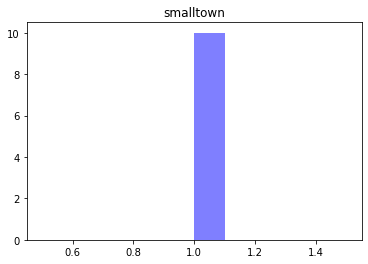

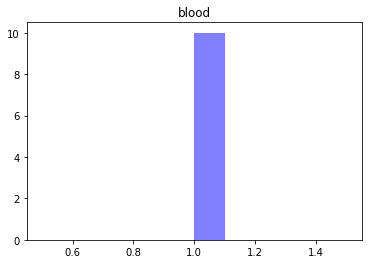

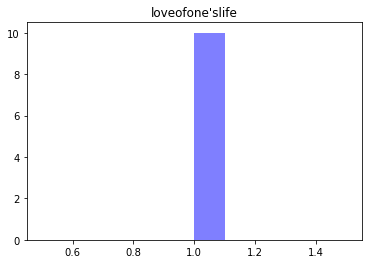

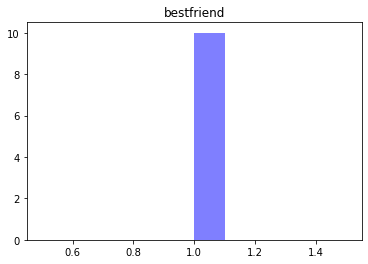

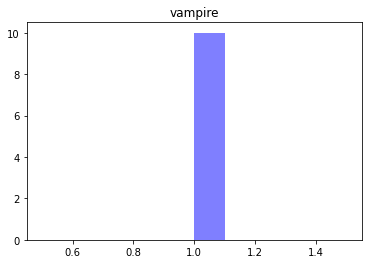

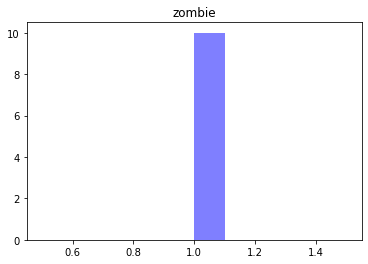

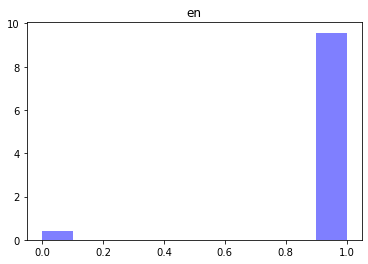

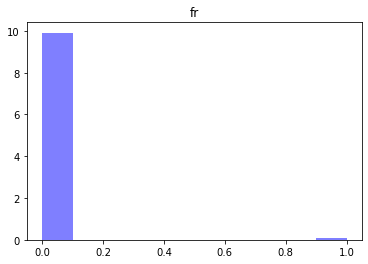

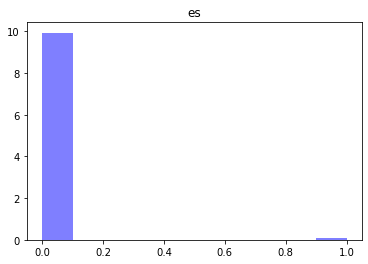

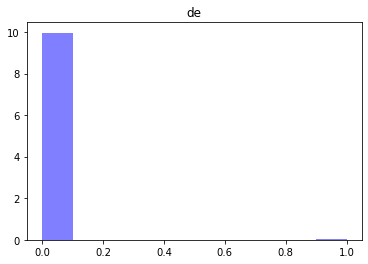

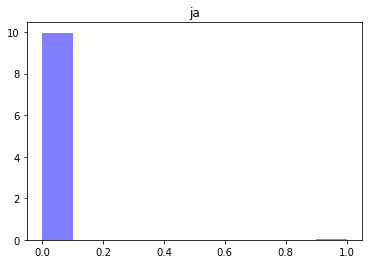

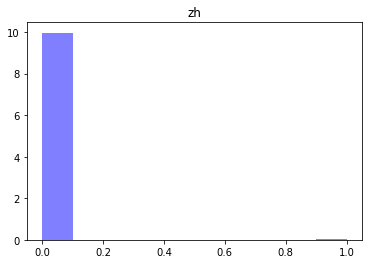

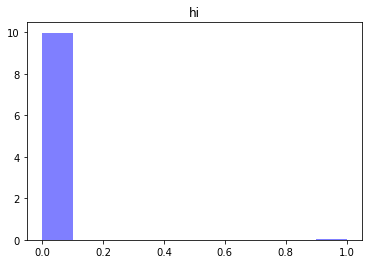

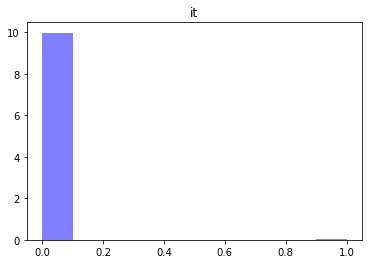

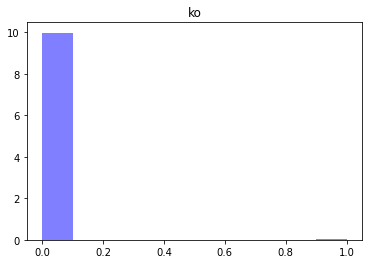

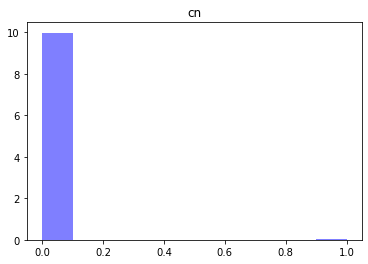

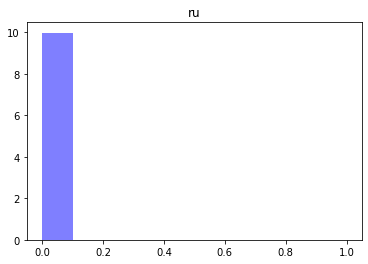

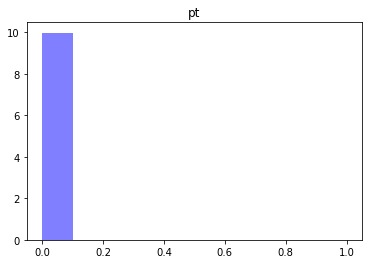

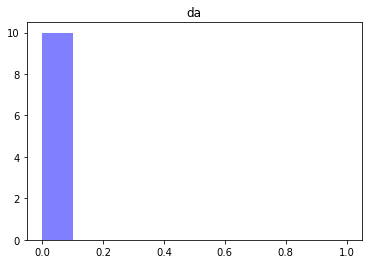

In [1276]:
for column in dataset.columns:
    plt.hist(
        dataset[column].tolist(),
        density=True,
        histtype='stepfilled',
        facecolor='b',
        alpha=0.5
    )
    plt.title(column)
    plt.show()

In [1277]:
scale=StandardScaler()
scale.fit(dataset)
scaled_features=scale.transform(dataset)
reduced_data = PCA(n_components=2).fit_transform(dataset, cluster_labels)

[[ 2.68423404e+09  2.79496282e+08]
 [ 8.97773603e+08 -1.08227258e+08]
 [ 8.08929163e+08 -6.84298474e+07]
 ...
 [-9.92690274e+07  1.57749952e+07]
 [-1.01314867e+08  1.56187351e+07]
 [-1.01316471e+08  1.56275909e+07]]


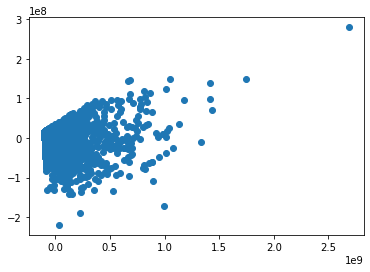

In [1278]:
print(reduced_data)


plt.scatter(
    x=reduced_data[:, 0],
    y=reduced_data[:, 1],
)
plt.show()

k:2 silhouette_avg:0.7874186371723434
k:3 silhouette_avg:0.6868621023552818
k:4 silhouette_avg:0.6243399523163823
k:5 silhouette_avg:0.6210811279600144
k:6 silhouette_avg:0.5875073831878935
k:7 silhouette_avg:0.5512239957427775
k:8 silhouette_avg:0.5407229713847762
k:9 silhouette_avg:0.5351551299287293
k:10 silhouette_avg:0.48271993343870767
k:11 silhouette_avg:0.46037133739503805
k:12 silhouette_avg:0.4826638402380396
k:13 silhouette_avg:0.4787591221766443
k:14 silhouette_avg:0.4581162919379841
k:15 silhouette_avg:0.4724671528570804


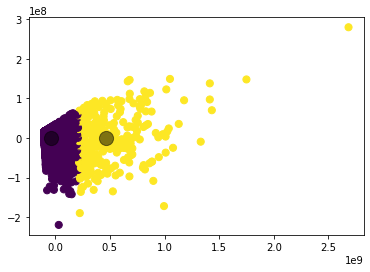

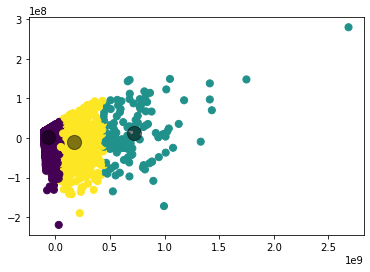

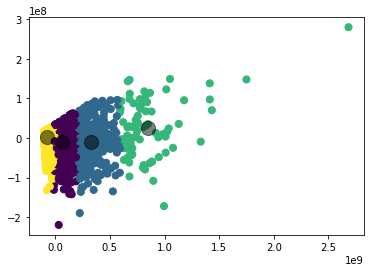

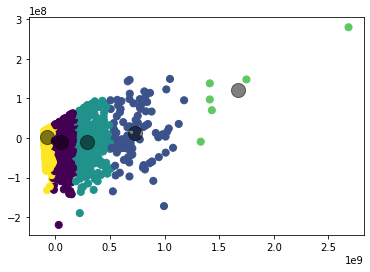

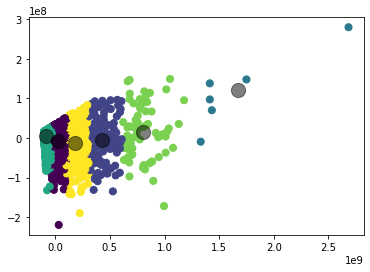

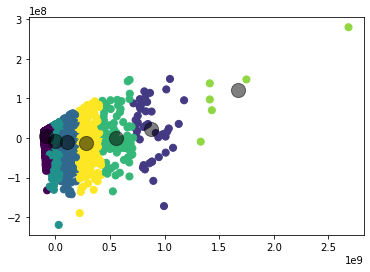

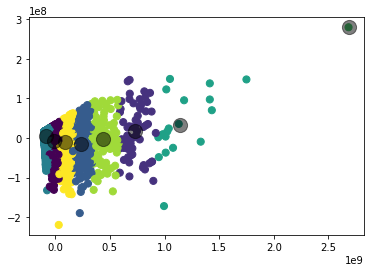

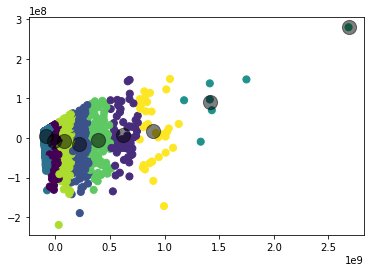

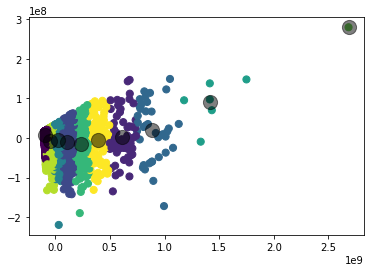

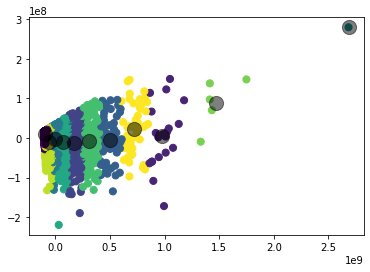

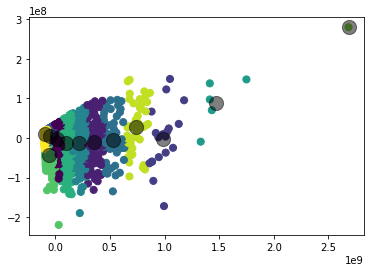

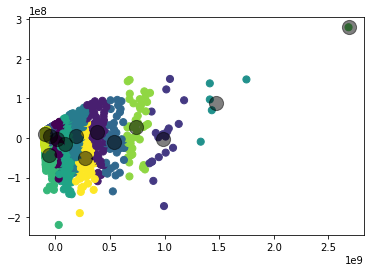

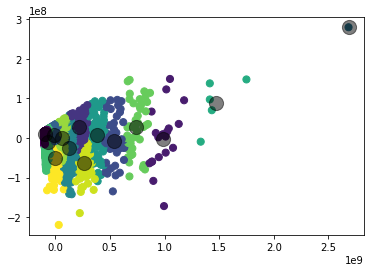

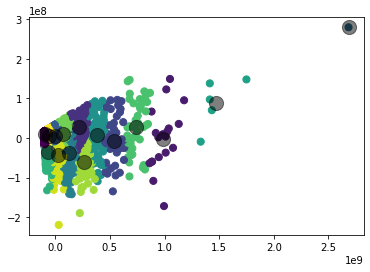

In [1279]:
for k in range(2,16):
    kmeans = KMeans(n_clusters=k, random_state=10)
    y_kmeans = kmeans.fit_predict(reduced_data)

    silhouette_avg = silhouette_score(reduced_data, y_kmeans)
    print("k:{} silhouette_avg:{}".format(k, silhouette_avg))

    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=y_kmeans, s=50, cmap='viridis')

    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    plt.show()

k:2 silhouette_avg:0.7774158534456672
k:3 silhouette_avg:0.6662055560095967
k:4 silhouette_avg:0.6175726005246416
k:5 silhouette_avg:0.5888993842799447
k:6 silhouette_avg:0.5357763087665033
k:7 silhouette_avg:0.4779047867063372
k:8 silhouette_avg:0.4448158851253
k:9 silhouette_avg:0.4504035775573062
k:10 silhouette_avg:0.4487729718380134
k:11 silhouette_avg:0.45573914275226723
k:12 silhouette_avg:0.40850377469654753
k:13 silhouette_avg:0.44864220120677845
k:14 silhouette_avg:0.44249469442610573
k:15 silhouette_avg:0.41176032853233835


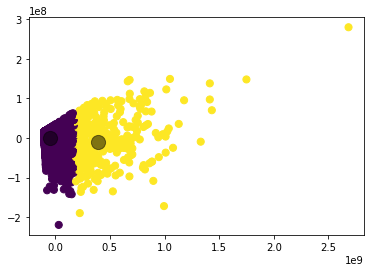

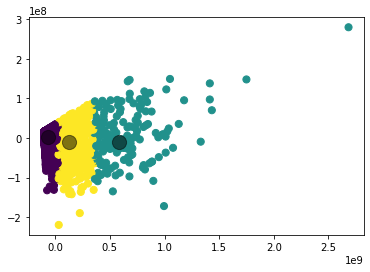

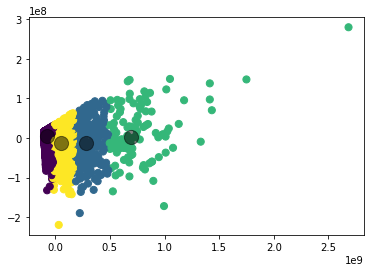

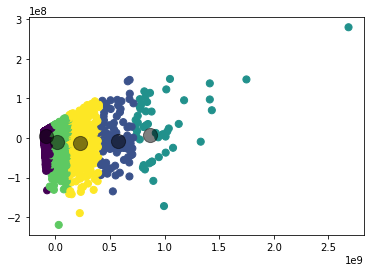

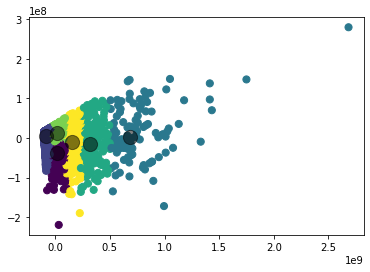

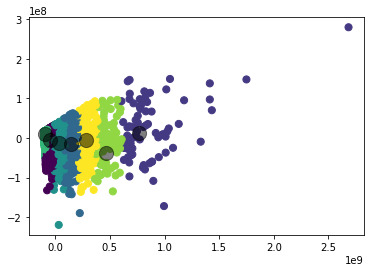

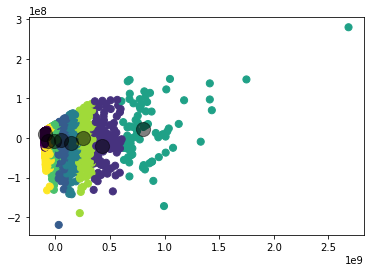

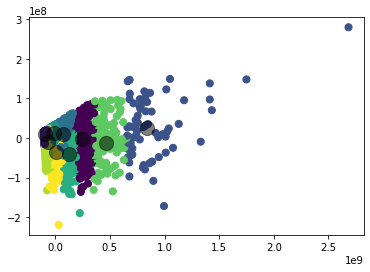

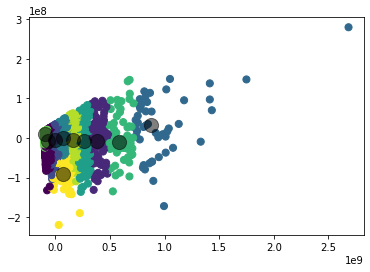

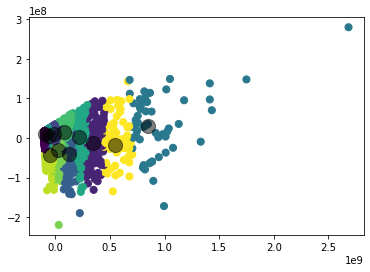

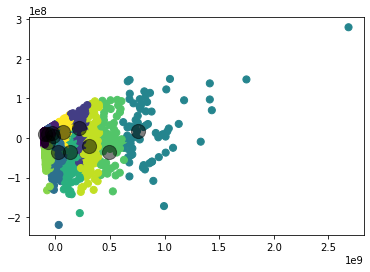

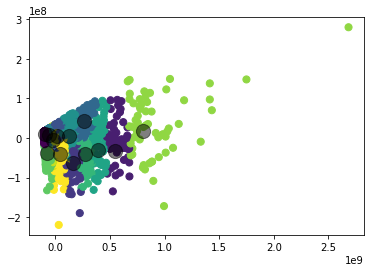

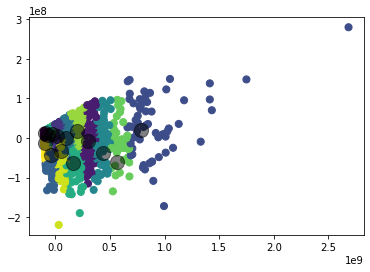

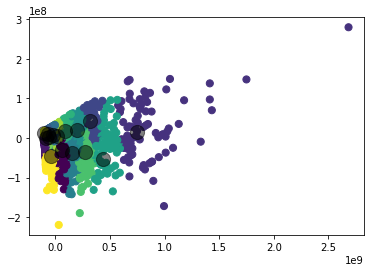

In [1280]:
for k in range(2, 16):
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=10)
    y_kmeans = kmeans.fit_predict(reduced_data)
    silhouette_avg = silhouette_score(reduced_data, y_kmeans)
    print("k:{} silhouette_avg:{}".format(k, silhouette_avg))


    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=y_kmeans, s=50, cmap='viridis')

    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    plt.show()

<ipython-input-1281-de6b42bc6b45>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  core_samples_mask = pd.np.zeros_like(db.labels_, dtype=bool)
<ipython-input-1281-de6b42bc6b45>:22: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  for each in pd.np.linspace(0, 1, len(unique_labels))]


k:15 silhouette_avg:-0.2901472308844943


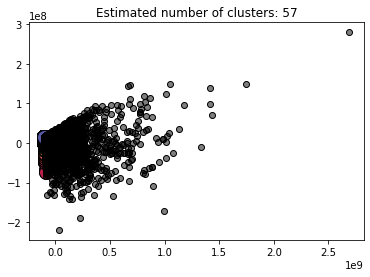

In [1281]:
# for k in range(2, 16):
if True:
    dbscan = DBSCAN(eps=0.1, min_samples=2)
    db = dbscan.fit(reduced_data)
    core_samples_mask = pd.np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    silhouette_avg = silhouette_score(reduced_data, labels)
    print("k:{} silhouette_avg:{}".format(k, silhouette_avg))

    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    # #############################################################################
    # Plot result
    import matplotlib.pyplot as plt

    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in pd.np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 0.5]

        class_member_mask = (labels == k)

        xy = reduced_data[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = reduced_data[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()